# Amphi 4 - Algorithms and Complexity

# 1. Complexity notions 

## 1.1 Time Complexity and Space Complexity

Operations performed by computer can be expressed in terms of a sequence of basic operations like:

- Read information in a memory cell (a bit, which can be 0 or 1)

- Update information in a bit

- Perform a comparison between 2 bits (==, !=, <)

- Perform a basic unary or binary operation (AND, OR, XOR, NOT, +)

The total necessary time of an operation in terms of number of basic operations is considered as its bit complexity or basic time complexity.

In term of bit complexity, a multiplication between 2 numbers $a$ and $b$ is much more complex than the addition of those 2 numbers. However, in comparison with other operations, their difference can be ignored. That is why we consider basic operations (addition, multiplication, division, etc.) to have very small complexity (can be done is less than $<c$ seconds). So, sometimes by time complexity, we refer to a notion where basic mathematics operations are considered to have the same complexity $O(1)$.

The total memory size used for an operation/algorithm is be considered as its space complexity. Like time complexity, space complexity can be expressed as bit level (the number of bits). Or we can consider objects/variables of the same type (like number) use the same amount of bits, hence express space complexity as the number of objects spontaneously stored during the operation.

Sometimes, we are not interested in the exact time or space necessary for some specific algorithm, but the behaviour of its complexity when we deal with very large data (for example, an array of $n$ elements, where $n$ very large). We use asymptotic analysis to study such behaviours.

## 1.2 Asymptotic Analysis

Let $f(n)$ and $g(n)$ be functions $\mathbf N \to \mathbf R$. We say that 

- $f(n) = O(g(n))$ if there exists $c > 0$ and $n_0 \in \mathbf N$ such that $f(n) \leq cg(n)$, for $n \geq n0$. We say that $f(n)$ is order of $g(n)$

- $f(n) = \Omega(g(n))$ if there exists $c > 0$ and $n_0 \in \mathbf N$ such that $f(n) \geq cg(n)$, for $n \geq n0$.

- $f(n) = \Theta(g(n))$ if $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$.

**The main functions in computer science for complexity**

| **Name**             | **Notation**                                     | **Example of algorithms**                           |
|----------------------|--------------------------------------------------|-----------------------------------------------------|
| Constant function    | $O(1)$                                           | Basic operations                                    |
| Logarithm function   | $(O\log n)$                                      | Binary search on sorted array                       |
| Linear function      | $O(n)$                                           | Find max on an array                                |
| N-Log-N function     | $O(n \log n)$                                    | Sort an array                                       |
| Quadratic function   | $O(n^2)$                                         | Find max on a square matrix                         |
| Polynomial function  | $O(n^d)$, $d \in \mathbf N$                      | Matrix multiplication                               |
| Exponential function | $O(c^{P(n)})$, $c \in \mathbf N, P$ a polynomial | Find a subset of an array satisfying some criterion |

## 1.3 Worst-case Complexity and Average Complexity

Due to data variability and randomness, algorithms may perform very different time and space complexity. We should consider:

- Worst-case complexity: What is the complexity in case the algorithm has to perform the maximum of operations to finish.

- Average complexity: What is its complexity in average?

For example, a naive sorting algorithm

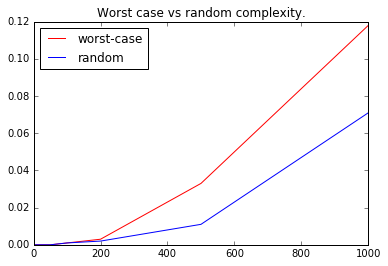

In [26]:
%matplotlib inline 

def naive_sort(A):
    for i in range(len(A)):
        for j in range(i, len(A)):
            if A[i] < A[j]:
                c = A[i]
                A[i] = A[j]
                A[j] = c

import time
import matplotlib.pyplot as plt
tests = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# WORST CASE
worst_process_time = []
for array_len in tests:
    my_list = range(array_len)
    begin = time.time()
    naive_sort(my_list)
    end = time.time()
    worst_process_time.append(end - begin)

# RANDOM
average_process_time = []
for array_len in tests:
    my_list = range(array_len)
    random.shuffle(my_list)
    begin = time.time()
    naive_sort(my_list)
    end = time.time()
    average_process_time.append(end - begin)

plt.plot(tests, worst_process_time, "r-", label="worst-case") 
plt.plot(tests, average_process_time, "b-", label="random")
plt.legend(loc="best")
plt.title("Worst case vs random complexity.")
plt.show()

# 2. Recursion

Recursion is calling a function inside itself for simpler arguments. We can use recursion to shorten our code and to replace loops.

The following example shows how to compute $n!$ using loops.

In [26]:
def factorial(n):
    if n == 0:
        return 1
    result = 1
    for i in range(1, n+1):
        result = result * i
    return result

print(factorial(50))

30414093201713378043612608166064768844377641568960512000000000000


We can use recurrence instead

In [27]:
def factorial2(n):
    if n == 0:
        return 1
    return factorial(n-1)*n

print(factorial(50))

30414093201713378043612608166064768844377641568960512000000000000


We can compare running time for these two algorithms by launching each of them 1000 times.

In [29]:
import time
t1 = time.time()
for i in range(1000):
    factorial(50)
print("Using loop took " + str(time.time() - t1) + " seconds")

t2 = time.time()
for i in range(1000):
    factorial2(50)
print("Using recurrence took " + str(time.time() - t2) + " seconds")

Using loop took 0.00500011444092 seconds
Using recurrence took 0.00499987602234 seconds


The two function has almost the same running time.

## 2.1 An example: Fibonacci sequence

We take an example to illustrate an abused use of recurrence. We want to compute the $n^{th}$ Fibonacci number $F_n$, where
$$
F_1 = 1; F_2 = 1
$$
$$
F_n = F_{n-1} + F_{n-2}, n \geq 3
$$

In [24]:
def Fibonacci(n):
    if n == 1 or n == 2:
        return 1
    return Fibonacci(n - 1) + Fibonacci(n - 2)

import time
t1 = time.time()
print(Fibonacci(30))
print("Abusing recurrence took " + str(time.time() - t1) + " seconds.")

832040
Abusing recurrence took 0.173000097275 seconds.


To look at how many times the function has been called for each $n$, we can use a counter like this

In [23]:
counter = [0] * 31 #Remind: [0] * 31 = [0, 0, 0, ...., 0] (31 times)

def Fibonacci(n):
    counter[n] += 1
    if n == 1 or n == 2:
        return 1
    return Fibonacci(n - 1) + Fibonacci(n - 2)

print(Fibonacci(30))
print(counter)
print(sum(counter[3:]))

832040
[0, 317811, 514229, 317811, 196418, 121393, 75025, 46368, 28657, 17711, 10946, 6765, 4181, 2584, 1597, 987, 610, 377, 233, 144, 89, 55, 34, 21, 13, 8, 5, 3, 2, 1, 1]
832039


That means, to compute the $30^{th}$ Fibonacci number, we have to call and compute 317811 times **Fibonacci(1)**, 514229 times **Fibonacci(2)**, and do 832039 additions, which is a waste of computation.

## 2.2 Negotiation between Time Complexity and Space Complexity

If an addition can be done in $m$ seconds, then the necessary time for computing **Fibonacci(30)** is something propotional to 832039$m$. In general, **Fibonacci(n)** can be doned in a period proportional to $\left( \frac{1+\sqrt{5}}{2} \right)^n$ seconds. (Try proving it as an exercise)

When Python compute a function, it will reserve some space to store local variables of the function. And when the function returns, it will free all spaces for local variables. Using the **Fibonacci** function, during the call to **Fibonacci(n)** there are at most **n** spaces that are busy at the same time, corresponding to this call:

<center>**Fibonacci(n) $\to$ Fibonacci(n-1) $\to$ ... $\to$ Fibonacci(2) $\to$ Fibonacci(1)**</center>

### Negotiation Between Time Complexity and Space Complexity

We can use spaces (memory) to negociate with time complexity. For example, the following implementation reduces the time to compute the $n^{th}$ Fibonacci number. 

In [19]:
computed_fibonaccis = [0, 1, 1]

def Fibonacci2(n):
    if n < len(computed_fibonaccis):
        return computed_fibonaccis[n]
    else:
        for j in range(len(computed_fibonaccis), n + 1):
            computed_fibonaccis.append(computed_fibonaccis[j - 1] + computed_fibonaccis[j - 2])
    return(computed_fibonaccis[n])

print(Fibonacci2(30))

832040


In [22]:
import time
t1 = time.time()
print(Fibonacci2(30))
print("Using recurrence with more memory took " + str(time.time() - t1) + " seconds.")

832040
Using recurrence with more memory took 0.0 seconds.


The algorithm **Fibonacci2** took a running time at max proportional to $N$ instead of some exponent function of $N$. Space complexity is still proportional to $N$.

We can use another intelligent way by looping on 2 variables.

In [31]:
def Fibonacci3(n):
    if n == 1 or n == 2:
        return 1
    a = 1
    b = 1
    for i in range(3, n + 1):
        c = a + b
        a = b
        b = c
    return b

print(Fibonacci3(30))

832040


The algorith **Fibonacci3** took a running time proportional to $N$ and a space complexity constant (only 3 local variables are needed everytime).

***Question: When should we use Fibonacci1, Fibonacci2, Fibonacci3?***

## 2.3 Further Examples of Recursion

### 2.3.1 Linear Recursion

If a recursive function calls at most one other, this is a linear recursion. For example, the above example calculating factorial of a number is a linear recursion. There is only one call of recursion inside the function.

**Binary Search**

Given a sorted array **A** of $n$ **int**, and an **int** **k**. Find one position $d$ of the array such that **A[d] = k**.

In [19]:
def search(A, k):
    return search_partial(A, k, 0, len(A))

def search_partial(A, k, begin, end):
    if begin >= end:
        return None
    elif end - begin == 1:
        if A[begin] == k:
            return begin
        else:
            return None
    else:
        middle = (end + begin)/2
        if A[middle] == k:
            return middle
        elif A[middle] > k:
            return search_partial(A, k, begin, middle)
        else:
            return search_partial(A, k, middle + 1, end)

print search([1, 2, 4, 6, 8, 10], 6)
print search([1, 2, 4, 6, 8, 10], 7)

3
None


**search_partial** a linear recursion example because in each call of **search_partial**, at most one another **search_partial** function is called. 

We plot a graph for complexity of binary search.

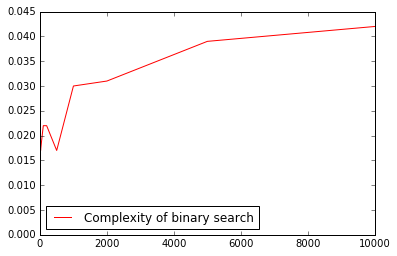

In [37]:
%matplotlib inline 
import time
import random
import matplotlib.pyplot as plt
tests = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

average_process_time = []
for array_len in tests:
    my_list = range(array_len)
    k = random.randint(0, array_len)
    begin = time.time()
    for i in range(10000):
        search(my_list, k)
    end = time.time()
    average_process_time.append(end - begin)

plt.plot(tests, average_process_time, "r-", label="Complexity of binary search")
plt.legend(loc="best")
plt.show()

We can show theorically that complexity of binary search is $O(\log n)$.

### 2.3.2 Binary Recursion

If a recursive function calls at most two others, it is a binary recursion.

**Merge Sort**

Given an unsorted array **A** of $n$ **int**. Sort the array in ascending order.

In [27]:
def merge_sort(A):
    return sort_partial(A, 0, len(A))

def sort_partial(A, begin, end):
    if end - begin <= 1:
        return A[begin: end]
    else:
        middle = (end + begin)/2
        left_list = sort_partial(A, begin, middle)
        right_list = sort_partial(A, middle, end)
        return merge(left_list, right_list)

def merge(list1, list2):
    A = []
    i = 0
    j = 0
    while i < len(list1) or j < len(list2):
        if j == len(list2):
            A.append(list1[i])
            i += 1
        elif i == len(list1):
            A.append(list2[j])
            j += 1
        elif list1[i] < list2[j]:
            A.append(list1[i])
            i += 1
        else:
            A.append(list2[j])
            j += 1
    return A

print merge_sort([2, 3, -1, 4, 1, 10, 6])

[-1, 1, 2, 3, 4, 6, 10]


We can plot a graph to approximate time complexity of merge-sort.

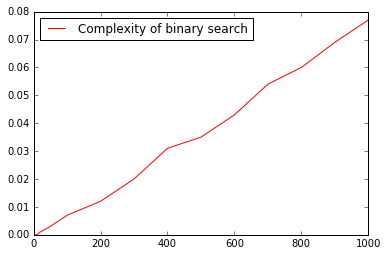

In [42]:
%matplotlib inline 
import time
import random
import matplotlib.pyplot as plt
tests = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

average_process_time = []
for array_len in tests:
    my_list = range(array_len)
    random.shuffle(my_list)
    begin = time.time()
    for i in range(10):
        merge_sort(my_list)
    end = time.time()
    average_process_time.append(end - begin)

plt.plot(tests, average_process_time, "r-", label="Complexity of binary search")
plt.legend(loc="best")
plt.show()

Theorically, merge-sort is $O(n \log n)$.

### 2.3.3 Multiple Recursion

Some recursive function calls more than one others. For example, we can use another version of **merge sort** by splitting the array into 3, 4, ... parts.

## 2.4 The master theorem

**binary search** and **merge-sort** give us examples of "divide and conquest" methods, in which, in order to perform an algorithm on an array of length $N$, we call the same algorithm on sub-arrays of length $N/2$, which, in turn, call the same algorithms on sub-arrays of length $N/4$. The following theorem tells us what the complexity of such algorithm is.

**Theorem**

If time complexity $T(n)$ of an algorithm on an array of size $n$ satisfies:

$$
T(n) = aT(\lceil n/b \rceil) + O(n^d)
$$

for some constants $a > 0, b > 1, d \geq 0$, then:

- $T(n) = O(n^d)$ if $d > \log_b a$
- $T(n) = O(n^d \log n)$ if $d = \log_b a$
- $T(n) = O(n^{\log_b a})$ if $d < \log_b a$

**Proof** (according to [1])

Suppose by convenience that $n$ is a power of $b$ (the general case follows by a multiplicative factor of $b$). 

The size of the subproblems decreases by a factor of $b$ with each level of recursion, and therefore reach the base case (size 1) after $\log_b n$ levels.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig1.png" width=800></img>
<center>(Illustration figure from [1])</center>

Hence we can draw a "recursion tree" of height $\log_b b$ levels. The $k$-th level of the tree is made of $a^k$ subproblems each of size $n/b^k$. The total work done at this level is 

$$
a^k \times O(\frac{n}{b^k})^d = O(n^d) \times \left( \frac{a}{b^d} \right)^k
$$

As $k$ goes from 0 to $\log_b n$, these numbers form a geometric series with ratio $a/b^d$. Hence, using the fact that $1 + x + \ldots + x^N = O(1), O(N), O(x^N)$ when $0 < x < 1, x = 1, x > 1$ respectively, we have

- T(n) = O(n^d) if $\frac{a}{b^d} < 1$, or $\log_b a < d$.
- T(n) = O(n^d)\log n if $\frac{a}{b^d} = 1$, or $\log_b a = d$.
- T(n) = O(n^{\log_b a}) if $\frac{a}{b^d} = 1$, or $\log_b a > d$. 

$\blacksquare$

## 2.5 Application of the Master Theorem on Binary Search and MergeSort

### Binary Search

In binary search, we have
$$
T(n) = T(\lceil n/2 \rceil) + O(1)
$$

where $O(1)$ is the complexity of the comparison with the middle point at each level. The master theorem allows us to conclude that $T(n) = O(\log n)$.

### MergeSort

In merge-sort, we have
$$
T(n) = 2T(\lceil n/2 \rceil) + O(n)
$$

where $O(n)$ is the complexity of the merge step at each level (merge 2 sorted list into 1 sorted list). The master theorem allows us to conclude that $T(n) = O(n \log n)$.

# 3. Bit Complexity of Basic Arithmetic Operations

In this section, we write $n = \log_2 N$ by convention.

## 3.1 Integer Addition and Substraction

Any integer in [0, N[ can be represented by at most $\lceil \log_2 (N) \rceil$ bits (in binary base). So space complexity to store an integer in [0, N[ is $O(n) = O(\log N)$.

As introduced in section 1, basic operations like reading a bit, writing to/updating a bit, comparing 2 bits can be done in constant time $O(1)$.

Addition on integers in $[0, N[$ ($n-$bit integers) can be done bitwisely by schoolbook algorithms (adding from right to left, using carry if necessary)

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig2.png" width=400></img>
<center>(Illustration from [1])</center>

Hence, addition of 2 $n-$bit positive integers is of time complexity $O(n)= O(\log N)$. The result is a $(n+1)$-bit integers.

Similarly, substraction of 2 $n-bits$ positive integers, and hence, addition of 2 $n-$bits integers (0, positive or negative) are of complexity $O(n)$.

## 3.2 Integer Multiplication

Schoolbook algorithm for multiplication of 2 $n-$bit integers is of complexity $O(n^2)$.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig3.png" width=300></img>
<center>(Illustration from [1] for $11 \times 13 = 143$)</center>

Divide-and-conquest technique gives us a better algorithm. Suppose that we have two $n-$bit positive integers $x$ and $y$. Write them as:

$$
x = 2^{n/2}x_L + x_R
$$
$$
y = 2^{n/2}y_L + y_R
$$

Then $xy$ can be computed by:
$$
xy = (2^{n/2}x_L + x_R) (2^{n/2}y_L + y_R) = 2^n(x_Ly_L) + 2^{n/2}(x_Ly_R + x_Ry_L) + x_Ry_R
$$

$$
= 2^n(x_Ly_L) + 2^{n/2}((x_L + x_R)(y_L + y_R) - x_Ly_L - x_Ry_R) + x_Ry_R
$$

That means, we divide the size of the problem by 2, and at this level we need to perform 2 $n/2-$bit integer additions $x_L + x_R$, $x_R + y_L$, then 3 $n/2-$bit integer multiplications, then 2 $n-$bit integer substractions and finally 2 $n-$ bit integer additions. Let $T(n)$ be the time complexity of multiplication by this method, we have:

$$
T(n) = 3T(n/2) + O(n)
$$

The master theorem with $a = 3, b = 2, d = 1$ allows us to conclude $T(n) = O(n^{\log_2 3}) = O(n^{1.59})$

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig4.png" width=500></img>
<center>(Illustration from [1] for multiplication algorithm)</center>

We can even design stronger algorithms for multiplication. The **Fast Fourier Transform** or **Schonhage-Strassen** algorithm is widely used in computation, its complexity is $O(n\log n \log \log n)$.

## 3.3 Division

The following recursive algorithm is a basic method for integer division.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig5.png" width=500></img>
<center>(Illustration from [1] for division$)</center>

Let $T(n)$ denote the complexity. As the algorithm can be made stop when $x < y$, the complexity depends on size of $x$ rather than size of $y$, we have:

$$
T(n) = T(n-1) + O(n)
$$

Like master theorem, we can prove that this algorithm is $O(n^2)$.

The Newton-Raphson algorithm presents a method to deal with integer division where we take quotient to be a real number. To divide $x$ by $y$, it takes the reciprocal of $y$ and multiply it by $x$. The steps of this method are:

- Without loss of generality, move the floating point of $x$ and $y$ such that $1 \leq y < 2$.

- Calculate an estimate $z_0$ of $1/y$. One can choose $z_0 = 48/17 - 32/17 * y$

- Compute successively more accurates estimates $z_1, \ldots, z_s$ of $1/y$. using $f(z) = yz - 1$, apply Newton-Raphson iteration to $f$ for $\lceil \log_2 \frac{P+1}{\log_2 17} \rceil$, where $P$ is the precision in term of binary places

$$
z_{i+1} = z_i - \frac{f(z_i)}{f'(z_i)} = z_i(2 - yz_i)
$$

- Return $x \cdot z_s$.

To calculate the integer quotient, it suffices to take the integer part of the real number quotient. 

It can be proven that in case $x$ and $y$ are integers, we just need to use a constant time of $n-$bit integer multiplications as the most considerable operations. The complexity is then $O(M(n))$ where $M(n)$ is the complexity of integer multiplication.

## 3.4 Integer Exponentiation

To calculate $a^k$ where $a$ is an $n-$bit integers, we can use the recursive method (exponentiation by squaring):

- Calculate $b = a^{[k/2]}$

- If $k$ even, return $b*b$

- Elsewhere, return $b*b*a$.

Let $T(n, k)$ denote the complexity, then:

$$
T(n, k) = T(n, k/2) + O((nk/2)^{d})
$$

where $O((nk/2)^{d})$, $d \approx 1.59$ is the complexity of $nk/2-$bit integer multiplications. 

Consider it as a function on $k$, we have $T(n, k) = (nk)^d$ by master theorem.

## 3.5 Real Numbers

Operations on real numbers are in fact operations on integer with some floating points handling. The first different case is division, with has been solved with Newton-Ralphson method. The second is exponentiation with real exponent, this can be done by logarithmic computation (not handled in this course).

## 3.6 Operations on Z/NZ (modular operations)

In exercise, we will prove that operations modulo $N$ have the following complexity:

- Addition: $O(n)$
- Multiplication: $O(n^2)$
- Division: given $a, b$, find $x$ such that $ax = b$ (mod $N$): $O(n^3)$
- Exponentiation: $O(n^3)$

Applications:
- Test whether an integer $p<N$ is a prime number: $O(n^3)$ in average.
- Generate a random prime number: $O(n^3 \log n)$ in average.

# 4. Complexity of Operations on Matrices

In this part, suppose that basic addition, multiplication and division on numbers can be done in $O(1)$.

## 4.1 Matrix Multiplication

The schoolbook rule for multiplication of an $m \times n$ and an $n \times p$ matrix has complexity $O(mnp)$, as $mnp$ multiplications and $O(mnp)$ additions are used.

If $m=n=p$, using a divide-and-conquest method, we can reduce this complexity.

In fact, if 

$$
X = \begin{pmatrix}
A & B\\
C & D
\end{pmatrix}, Y = \begin{pmatrix}
E & F\\
G & H
\end{pmatrix}
$$

Let
$$
P_1 = A(F-H), P_2 = (A+B)H, P_3 = (C+D)E, P_4 = D(G-E)
$$
$$
P_5 = (A+D)(E+H), P_6 = (B-D)(G+H), P_7 = (A-C)(E+F)
$$

then

$$
XY = \begin{pmatrix}
P_5 + P_4 - P_2 + P_6 & P_1 + P_2\\
P_3 + P_4 & P_1 + P_5 - P_3 - P_7
\end{pmatrix}
$$

Let $T(n)$ be the complexity (still with supposition multiplication on integers = O(1)), we have
$$
T(n) = 7T(n/8) + O(n^2)
$$

By the master theorem, $T(n) = O(n^{\log_2 7}) \approx O(n^{2.807}).$

With better algorithms (Optimized CW-like algorithms), we can have an $O(n^{2.373})$-algorithm for square matrix multiplication

## 4.2 Other operations

- Matrix inversion can be done as fast as matrix multiplication ($O(n^{2.373})$).

- Singular value decomposition of $m \times n$ or $n \times m$ matrix ($m \leq n$) can be done in $O(mn^2)$.

- Determinant can be computed as fast as matrix multiplication $O(n^{2.373})$. 

# 5. Complexity of operations on str, list, tuple, set and dict in Python

In this part we study the abstractions that basic iterable classes in Python: **str**, **list**, **tuple** etc. represent. Refer to [3] for further understanding.

## 5.1 Referential Arrays

Suppose that we want to store a list of objects of different sizes. If we store it consecutively in the memory, either:

- We use the same memory size for each element, typically the largest element. This leads to waste of memory.

- We use different memory size that fit each element. This leads to difficulty to calculate the memory address of an arbitrary element.

To deal with this, we can store any element in some arbitrary address and then store the address in the list. As a memory address is an object of fixes size (typically 64 bits). The list becomes a **referential array** where we store memory addresses of elements instead of the elements themselves. Then we can calculate efficiently the memory address of an arbitrary element (finding the $k-$th element of an arithmetic progression), and use this information to access the required element. 

This mechanism is used to implement **list** and **tuple** in Python.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig6.png" width=500></img>
<center>Illustration from [3]</center>

## 5.2 Compact Arrays

In case of **str**, not necessary to use a referential array to store elements, because all elements are characters, hence of the same size (16 bits typically). So we can use a direct array to store value of elements. This is the notion of **compact array** and it is used to store **str** in Python.

In case of **list**, if we know that elements of the list are of the same size, we can use **array** module (https://docs.python.org/2/library/array.html#module-array).

## 5.3 Dynamic Arrays and Amortization

### 5.3.1 Size of the Referential Array

One difficulty that we usually face with on **list** is mutable operations. For example, calling **append**, **insert** can increase the list's size, hence increase the size of the referential array it uses.  In general, Python use a larger referential array to store references of elements on a list. So, in case of few insertions, the referential array's size may not change although the real list size increases.

To check for size in bytes of the referential array used for a list, use **sys.getsizeof**.

In [9]:
import sys
data = []
data.append(1)
data.append(2)
print("Length of the list: %d" % len(data))
print("Size of the referential array (in bytes): %d" % sys.getsizeof(data))
print("Now add more elements")
data.append(7)
print("New length of the list: %d" % len(data))
print("New size of the referential array: %d" % sys.getsizeof(data)) #May not change
data.append(8)
print("New length of the list: %d" % len(data))
print("New size of the referential array: %d" % sys.getsizeof(data)) #May not change

Length of the list: 2
Size of the referential array (in bytes): 96
Now add more elements
New length of the list: 3
New size of the referential array: 96
New length of the list: 4
New size of the referential array: 96


### 5.3.2 Dynamic Arrays. Extension and Shrinkage

However, when a list's real length is modified too much, we may have to adapt the referential array by changing its size. One mechanism is that when the current size is fully used, we create a new array of larger size (for example, twice of the current size). This is call **extension**.

Inversely, if the real length of the list is reduced to some proportion of the current referential array's size, we recreate a new array of smaller size (for example, half of the current size). This is call **shrinkage**.

An array whose size can be modified by **extension** and **shrinkage** when some specified proportion of its storage is used is called a **dynamic array**. 

**list** objects in Python implement dynamic array's mechanism.

In [13]:
import sys
data = []
print("Inserting 0, ..., 9")
for i in range(10):
    data.append(i)
    print("List is now %s, size of referential array is now %d" % (data, sys.getsizeof(data)))

print("Removing elements")
for i in range(10):
    data.pop()
    print("List is now %s, size of referential array is now %d" % (data, sys.getsizeof(data)))

Inserting 0, ..., 9
List is now [0], size of referential array is now 96
List is now [0, 1], size of referential array is now 96
List is now [0, 1, 2], size of referential array is now 96
List is now [0, 1, 2, 3], size of referential array is now 96
List is now [0, 1, 2, 3, 4], size of referential array is now 128
List is now [0, 1, 2, 3, 4, 5], size of referential array is now 128
List is now [0, 1, 2, 3, 4, 5, 6], size of referential array is now 128
List is now [0, 1, 2, 3, 4, 5, 6, 7], size of referential array is now 128
List is now [0, 1, 2, 3, 4, 5, 6, 7, 8], size of referential array is now 192
List is now [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], size of referential array is now 192
Removing elements
List is now [0, 1, 2, 3, 4, 5, 6, 7, 8], size of referential array is now 192
List is now [0, 1, 2, 3, 4, 5, 6, 7], size of referential array is now 192
List is now [0, 1, 2, 3, 4, 5, 6], size of referential array is now 144
List is now [0, 1, 2, 3, 4, 5], size of referential array is now 1

### 5.3.3 Complexity of append and pop on list

As seen from the demonstration, an **append** or a **pop** can simply add store an element to some memory address then store this address to the referential list, which is of complexity $O(1)$. Or it can create a new referential array, copying addresses of current elements to this new one, the complexity is then $O(n)$, where $n$ denotes the current length of the list.

Suppose that we only extend the referential list by doubling its size when the list attains a length of $2^k$, then the complexity of **append** can be illustrated as follows:

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig7.png" width=400></img>

Suppose we perform $n$ appends from the empty list. WLOG, suppose $n=2^k$ for some $k$. Suppose that $O(1)$ is less than $c$ basic operations and $O(n) \leq cn$, then the total complexity for $n$ appends does not exceed:

\begin{align}
c\cdot 2^0 + c\cdot 2^1 + c + c\cdot 2^2 + c + c + c + c\cdot 2^3 + \ldots + c\cdot 2^k &= c(n - k - 1) + c(2^0 + \ldots + 2^k) \nonumber \\
&= c(n - k - 1) + c(2^{k + 1} - 1) \nonumber \\
&= 3cn - ck - 2c
\end{align}

Hence, it is $O(n)$. That means, the average complexity of **append** is $O(1)$. By **O(1) by amortization**, we mean a complexity to have average complexity $O(1)$ while for some case it may be much larger than $O(1)$, but those cases happen with small probability.

The same is true for **pop**.

## 5.4 Operations on tuple and list

### Immutable operations
| Operation                         | Running Time                                                |
|-----------------------------------|-------------------------------------------------------------|
| **len(data)**                     | $O(1)$                                                      |
| **data[j]**                       | $O(1)$                                                      |
| **data.count(value)**             | $O(n)$                                                      |
| **data.find(value)**              | $O(k)$, k is the position of value                          |
| **value in data**                 | $O(k)$, k is the position of value                          |
| **data1 == data2** (!=, <, <=...) | $O(k)$, k is the first position when **data1[k]!=data2[k]** |
| **data[j:k]**                     | $O(k-j)$                                                    |
| **data1 + data2**                 | $O(n_1 + n_2)$, $n_1, n_2$ are those length                 |
| **c\*data**                       | $O(cn)$                                                     |

### Mutable operations on list
| **Operation**                         | **Running Time**        |
|---------------------------------------|-------------------------|
| **data[j]=val**                       | $O(1)$                  |
| **data.append(val)**                  | $O(1)$ (in average)     |
| **data.insert(k, value)**             | $O(n - k)$ (in average) |
| **data.pop()**                        | $O(1)$ (in average)     |
| **data.pop(k)**                       | $O(k)$ (in average)     |
| **data.remove(value)**                | $O(n)$ (in average)     |
| **data.extend(data2)**                | $O(n_2)$ (in average)   |
| **data.reverse()**                    | $O(n)$                  |
| **data.sort()**                       | $O(n \log n)$           |

## 5.5 Hash Maps

The **dict** class of Python is an implementation of an abstraction type called **Map** or mapping in mathematics. Maps are used when we want to stored some key-values pairs $(k, V)$ for easy searching on keys. The most often operations of a map **d** are:

- get value associated to some key: **d[k]**

- insert or update a value associated to some key: **d[k] = V**

- check if some key exists in the map: **k in d**

- get all keys in the map: **d.keys()**

- get all values: **d.values()**

- get all keys and values: **d.items()**

- delete value associated to a key: **del(d[k])**.

As shown in lesson 1, to store a map, one data type we can think of is a table, called Hash Table. Suppose the map size is $n$, we can use a table of $N$ places to store references of those $n$ pairs (In pratice, $N > n$). Each place in the table will store 0, 1 or more elements. We will call such a place a **bucket**. So a hash table contains $N$ buckets which store references that allow us to refer to the $n$ elements.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig8.png" width=400></img>
<center>Illustration from [3]. In this picture, $n=7$, $N=11$. The keys are 1, 25, 3, 14, 6, 39, 7. The values are letters.</center>

In order to decide in which bucket the elements are stored, we use:

- A **hash function** to transform a key into an integer, which is called the **hash code** of the key. Example: built-in **hash** of Python.

- A **compression function** to transform the **hash code** into an integer from 0 to $N-1$, i.e., the bucket index in the hash table. Example: take $(x \mod N)$ or take $(ax + b) \mod N$ for some random $a, b$.

- A **collision-handling scheme**: If many elements are to be stored due to hash function and compression function choice, what we should do to avoid collision. Example:
 - **Separate chaining**: In each bucket, store reference of the first element. The first element store its items together with the reference of the second elements and so on.
 <img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig9.png" width=400></img>
 <center>Illusion from [3] for separate chaining. In worst case, searching for a key or insert a new (key, value) is $O(n)$</center>
 - **Linear probing**: If collision, store data in the nearest empty bucket to the right.
 <img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson4/Amphi/Fig10.png" width=400></img>
 <center>Illusion from [3] for linear probing. In worst case, searching for a key or insert a new (key, value) is $O(n)$</center> 

The factor $n/N$ is called **load-factor** of the map. If $n$ increases to some specific value, we may extend the hash table (like for dynamic array). For Python **dict**, extension is performed when the load-factor reach 2/3. When performing an extension, we recompute items' bucket using a new compression function. The extension can expectedly be done in $O(n)$. In worst case, it is done in $O(n^2)$. 

In this course, a hash table together with associated objects like its hash function, its compression function, its collision-handling scheme, its load factor handling rule is called a hash map. (In other contexts, hash map and hash table may mean the same).

## 5.6 Operations on dict

We have described hash maps and known that **dict** in Python implements hash map operations. We have the following complexity on **dict**.

| **Operation**                                         | **Expected Time** | **Worst case** |
|-------------------------------------------------------|-------------------|----------------|
| **data[k]**                                           | $O(1)$            | $O(n)$         |
| **data[k] = V**                                       | $O(1)$            | $O(n)$         |
| **del(data[k])**                                      | $O(1)$            | $O(n)$         |
| **k in data**                                         | $O(1)$            | $O(n)$         |
| **len(data)**                                         | $O(1)$            | $O(1)$         |
| **data.keys()** , **data.values()**, **data.items()** | $O(n)$            | $O(n)$         |

## 5.7 Operations on set and frozenset

**set** and **frozenset** in Python also implement hash maps. In stead of storing $(k, V)$, they store $k$ only.  

| **Operation**                        | **Average case**        | **Worst Case**       |
|--------------------------------------|-------------------------|----------------------|
| **x in s**                           | $O(1)$                  | $O(n)$               |
| Union **s$|$t**                      | $O(len(s)+len(t))$      | $O(len(s) * len(t))$ |
| Intersection **s&t**                 | $O(min(len(s), len(t))$ | $O(len(s) * len(t))$ |
| Difference **s-t**                   | $O(len(s))$             | $O(len(s) * len(t))$ |
| **s.difference_update(t)**           | $O(len(t))$             | $O(len(s) * len(t))$ |
| Symmetric Difference **s^t**         | $O(len(s))$             | $O(len(s) * len(t))$ |
| **s.symmetric_difference_update(t)** | $O(len(t))$             | $O(len(t) * len(s))$ |
| Subset **s <= t**                    | $O(len(s))$             | $O(len(t) * len(s))$ |
| Add                                  | $O(1)$                  | $O(n)$               |
| Remove                               | $O(1)$                  | $O(n)$               |

## 5.8 Pattern Matching

## 5.9 Operations on str

## 5.10 Summary

| **Python's class** | **Abstract data type**                      | **Frequent operations and complexity** |
|--------------------|---------------------------------------------|----------------------------------------|
| tuple              | Fixed-size Array Referential Array          | 5.4                                    |
| list               | Dynamic Array Referential Array             | 5.4                                    |
| str                | Fixed-size Array Compact Array              | 5.9                                    |
| dict               | Hash Map with Dynamic, Referential Array    | 5.6                                    |
| set                | Hash Map with Dynamic, Referential Array    | 5.7                                    |
| frozenset          | Hash Map with Fixed-size, Referential Array | 5.7                                    |

# 6*. Sorting (cont'd)
**This is an additional topic**

## 6.1 Merge-sort

## 6.2 Quick-sort

## 6.3 Heap-sort

# 7. Parallel Processing with Pool in Python

# 8. Regular Expressions

# 9. pandas (cont'd)

## References

[1] S. Dasgupta, C. H. Papadimitriou, and U. V. Vazirani, *Algorithms*.

[2] Robert Cori, Guillaume Hanrot, Claire Kenyon et Jean-Marc Steyaert, *Conception et analyse d'algorithmes.*

[3] Michael T. Goodrich, Roberto Tamassia, Michael H. Goldwasser, *Data Structures and Algorithms in Python*